#  NAME = ABHISHEK SHARMA
UNIVERSITY ROLLNO = 191500036
  
 gmail= abhishek.sharma_cs19@gla.ac.in

# FOREST FIRE PREDICTION PROJECT

A regression problem tries to expect a non-stop variable. This may want to suggest predicting the amount of water used in the town , the foot visitors at a mall, or the earnings of an employer. For the chosen dataset, I will be predicting the scale of a woodland fireplace primarily based on  capabilities  which include geospatial information, wind, temperature and humidity.
           

# Import Required Libraries and Dataset

Numpy is the library used for all mathematical things. Pandas is the best toolavailavble for importing and managing datasets.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

In [5]:
df=pd.read_csv("forestfires.csv")

# Data Description

 The goal of the Data Description Document is to record all information about the data files and their contents so that someone can use the data in a future research project and understand the data's content and structure

In [6]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
df.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

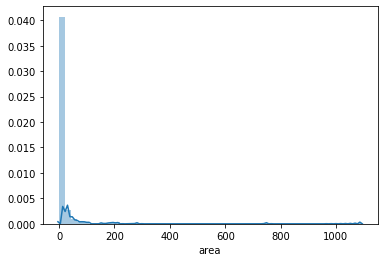

In [10]:
sns.distplot(df['area'])

In [11]:
df['area']=np.log(df['area']+1)

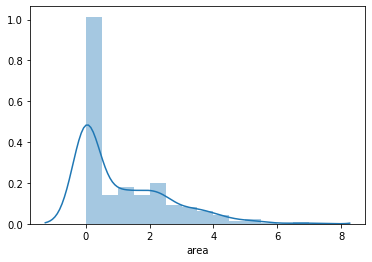

In [12]:
sns.distplot(df['area'])

In [13]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [14]:
df.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [15]:
df['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

# Visualization Dataset
        
 Data Visualization is the presentation of data in graphical format. It helps people understand the significance of data by summarizing and presenting a huge amount of data in a simple and easy-to-understand format and helps communicate information clearly and effectively.

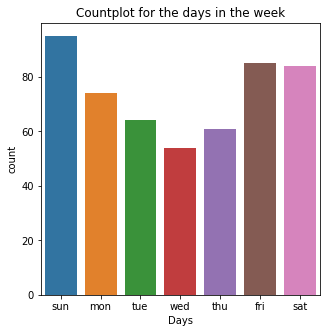

In [16]:
plt.rcParams['figure.figsize']=[5,5]  #figure size
day=sns.countplot(df['day'],order=['sun','mon','tue','wed','thu','fri','sat'])  #arrange the order
day.set(title='Countplot for the days in the week', xlabel='Days',ylabel='count');  #plot the values in xy plan

In [17]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620


In [18]:
df.month.unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [19]:
df['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

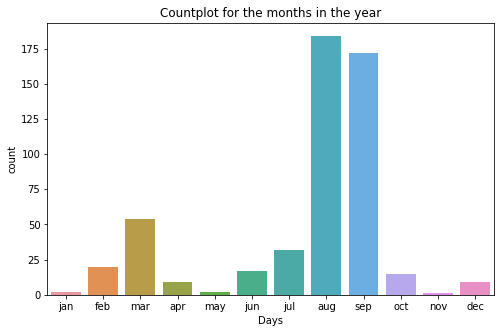

In [20]:
plt.rcParams['figure.figsize']=[8,5]  #figure size
day=sns.countplot(df['month'],order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])  #arrange the order
day.set(title='Countplot for the months in the year', xlabel='Days',ylabel='count');  #plot the values in xy plan

# Draw the heatmap
      
A heatmap is a graphical representation where individual values of a matrix are represented as colors. A heatmap is very useful in visualizing the concentration of values between two dimensions of a matrix. This helps in finding patterns and gives a perspective of depth.

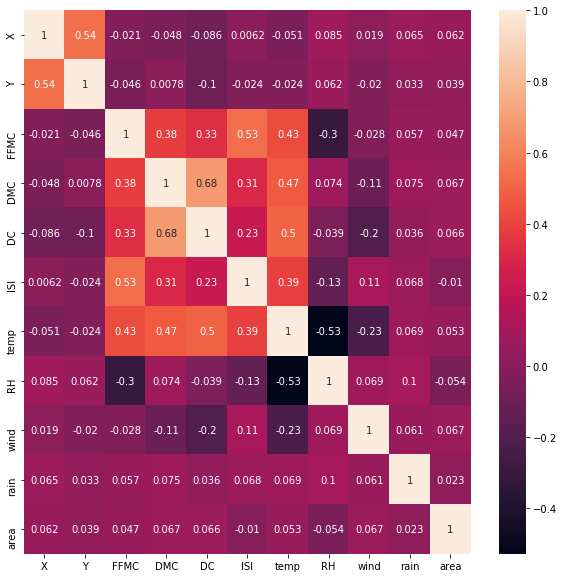

In [21]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data = corr, annot=True)

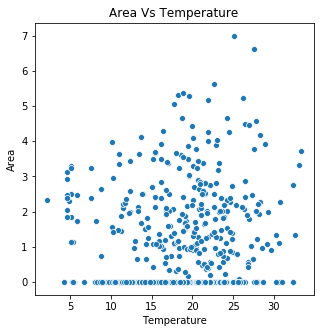

In [22]:
plt.rcParams['figure.figsize']=[5,5]  #figure size
scat = sns.scatterplot(df['temp'],df['area'])
scat.set(title='Area Vs Temperature', xlabel='Temperature',ylabel='Area');  #plot the values in xy plan

# Reforming the Dataset

In [23]:
df['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12 }, inplace = True)

In [24]:
df['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

In [25]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


# Train Test Split

The train-test split is a technique for evaluating the performance of a machine learning algorithm. It can be used for classification or regression problems and can be used for any supervised learning algorithm. The procedure involves taking a dataset and dividing it into two subsets

In [27]:
y=df['area']
x=df.drop(columns ='area')

In [28]:
x

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,1,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,1,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,1,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [29]:
y

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

In [30]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = .25, random_state =50)

In [31]:
x_test

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
463,6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0
418,2,4,8,1,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0
391,8,6,9,6,91.1,91.3,738.1,7.2,20.7,46,2.7,0.0
370,7,4,9,1,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0
166,6,5,8,4,92.1,111.2,654.1,9.6,16.6,47,0.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
489,4,4,8,4,95.1,141.3,605.8,17.7,20.6,58,1.3,0.0
162,6,3,3,7,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0
81,1,2,8,1,90.2,99.6,631.2,6.3,17.9,44,2.2,0.0
507,2,4,8,6,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0


# MODELS

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data

### Linear Regression
Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting
    
    
    


In [32]:
lr=LinearRegression() 
model= lr.fit(x_train,y_train)
lr_predictions = model.predict(x_test)
print(lr_predictions)

[0.59167205 1.41509845 1.14010375 1.6054665  0.87569653 1.37778505
 1.52508359 1.10150968 1.39505285 1.43559994 1.89382951 1.03833232
 1.18855067 0.72502819 1.07964791 1.42495655 0.39703206 1.66063786
 1.19392228 1.34948265 0.74541613 1.36996623 0.84679852 1.32528395
 1.91623883 1.04745791 1.24886903 0.39558378 1.18855067 0.55305129
 1.16155916 1.46582415 1.48550074 0.96186248 1.24817402 0.86932741
 0.99043457 0.93885467 0.99247945 1.43179595 0.78400613 1.20864764
 0.88118543 0.86421176 0.58815639 1.25731504 1.28652973 1.37877464
 0.84360647 1.3294607  1.13341391 0.84739251 0.98982012 1.08539963
 0.86263149 0.74998685 0.89812382 1.43685528 1.06802118 1.11449914
 0.96179307 1.00814383 1.03760215 0.70346483 0.84959276 1.04525921
 1.09861117 1.07841162 1.06198364 1.18575193 0.80787391 1.2572001
 1.01410805 1.06226739 1.05514059 1.5621455  1.11664281 0.93464953
 0.90938545 1.16047938 0.79065685 1.37882407 1.04487415 1.07691084
 0.78689537 1.20700517 1.17448406 1.13295564 0.05188834 1.12291

In [33]:
print(lr.score(x_train,y_train)*100)

5.296047482037669


In [34]:
print('MSE=', mse(lr_predictions,y_test))
print('MAE=', mae(lr_predictions,y_test))
print('R2 Score=', r2_score(lr_predictions,y_test))

MSE= 1.9110524041518842
MAE= 1.130194590586168
R2 Score= -18.169634071267062


# Random Forest Regression
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.ession
 Random Forest Regression

In [35]:
rfreg = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
model = rfreg.fit(x_train,y_train)
rf_predictions = model.predict(x_test)
print(rf_predictions)

[1.49044193 1.2885832  1.03118052 0.74360826 0.63973932 0.67058751
 1.28995977 0.29638286 0.99708418 1.10963933 1.91257853 1.60125673
 2.32469512 0.31660151 0.4627037  1.21072644 0.98570471 1.61510879
 1.35336489 2.1815561  0.67814414 0.57818957 0.81838055 0.96104715
 3.25057628 1.07340327 1.13887806 1.05960492 2.32469512 1.15338471
 0.67039812 0.94764466 0.61104308 0.59297811 0.9842045  0.52240467
 0.78244386 1.12868447 0.9603117  1.2245869  0.44861388 0.41579339
 1.58394086 0.69664192 0.7390918  2.01565904 1.13533663 1.44588833
 0.825425   0.88687855 0.78517011 0.81585022 0.8972654  1.18165181
 0.59445312 0.88050293 0.6356235  0.6197256  0.8677447  0.67655277
 0.87201144 1.15582295 1.05280879 0.43047505 1.15043358 0.34162611
 0.46292538 0.72152286 1.33985631 0.77007202 1.62406152 1.73784327
 1.15996656 1.25559433 1.33558936 0.69999004 1.59387401 0.62429744
 1.82031721 0.72101586 0.63439923 1.5885148  1.00026713 1.05770911
 0.77452055 1.54941194 1.25950563 1.53897115 1.43644341 1.7094

In [36]:
print('MSE=', mse(rf_predictions,y_test))
print('MAE=', mae(rf_predictions,y_test))
print('R2 Score=', r2_score(rf_predictions,y_test))

MSE= 1.9900324281894444
MAE= 1.1343774086416591
R2 Score= -7.162761514437642


# Decision tree regression 

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision trees can handle both categorical and numerical data.

In [37]:
dt = DecisionTreeRegressor(max_depth = 13, random_state = 15)
model = dt.fit(x_train, y_train)
dt_predictions = model.predict(x_test)
print(dt_predictions)

[2.81669171 1.84530024 1.10194008 1.15373159 2.19722458 0.34353579
 0.34353579 0.         0.3435897  0.34353579 2.30058309 1.13805327
 0.         0.         0.         0.         0.         0.3074847
 0.         0.         0.         0.4157798  0.         2.9601051
 5.22982437 1.78339122 1.08180517 0.         0.         1.47017585
 1.89461685 0.4157798  0.         0.95935022 2.18575243 0.66782937
 0.86828898 2.13771045 0.34353579 0.34353579 0.         0.
 3.42323265 1.00063188 0.         1.50851199 0.         0.97662985
 0.         0.         0.57097955 0.         0.         2.39226179
 0.         0.         0.97662985 0.         4.12922896 0.
 2.12823171 0.         0.         0.         0.75141609 0.
 0.         0.         0.         0.         3.56558124 2.074429
 1.20896035 2.48463327 0.         0.34353579 2.8009081  2.02946317
 0.         0.         0.         0.4157798  2.06467884 4.66964621
 0.         3.8649314  0.         2.48463327 2.81669171 0.
 0.86828898 0.97662985 1.683447

In [38]:
print('MSE=', mse(dt_predictions,y_test))
print('MAE=', mae(dt_predictions,y_test))
print('R2 Score=', r2_score(dt_predictions,y_test))

MSE= 3.2799866847105905
MAE= 1.2880657549106438
R2 Score= -1.1567338074546671


# Predicting values

Predictive modelling largely overlaps with the field of machine learning. There are two types of predictive models. They are Classification models, that predict class membership, and Regression models that predict a number. These models are then made up of algorithms

In [39]:
ans=dt.predict ([[6,5,2,3,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0]])

In [40]:
print(ans)

[2.81669171]


# Creating a Pickle file

In [41]:
pickle.dump(dt, open('forest_fires','wb'))